Dataset loaded successfully: (70000, 784) (70000,)

🔹 Training Linear SVM...

🔹 Training Polynomial SVM with Grid Search...
  Best Parameters (Poly): {'C': 1, 'coef0': 1.0, 'degree': 3}

🔹 Training RBF SVM with Grid Search...
  Best Parameters (RBF): {'C': 5, 'gamma': 'scale'}

🔹 Training KNN...

🔹 Training SGD Classifier...

🔹 Training Random Forest...

===== Classifier Comparison on MNIST =====
              Model  Accuracy  Precision    Recall        F1  \
2         SVM (RBF)  0.957857   0.957893  0.957857  0.957670   
1  SVM (Polynomial)  0.948571   0.948591  0.948571  0.948432   
5     Random Forest  0.944286   0.944578  0.944286  0.944002   
3         KNN (k=3)  0.943571   0.944927  0.943571  0.943338   
0      SVM (Linear)  0.914286   0.914061  0.914286  0.913780   
4               SGD  0.872857   0.876719  0.872857  0.873072   

   Training Time (s)  
2              68.71  
1             109.74  
5               4.86  
3               0.53  
0               3.32  
4            

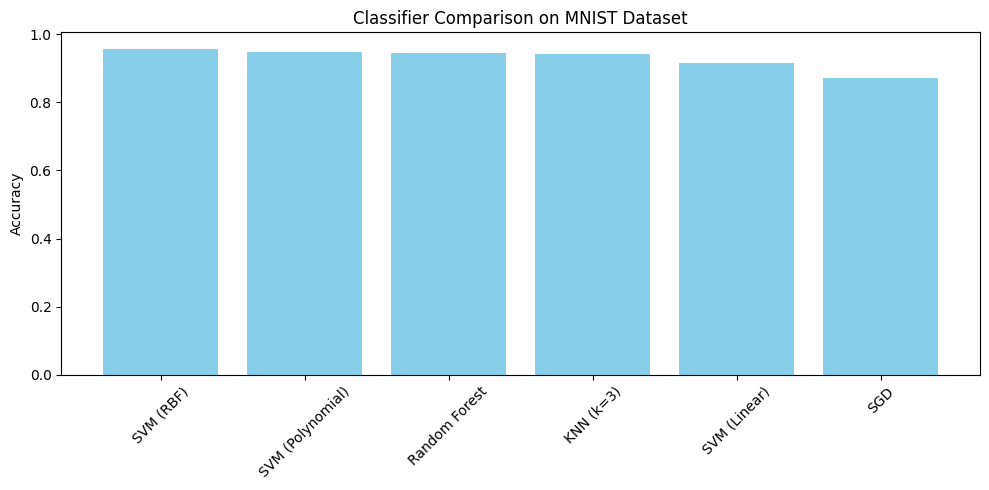


✅ Results saved as 'mnist_results.csv' and 'mnist_comparison.png'


In [2]:
"""
Building an SVM Classifier for MNIST with Hyperparameter Tuning and Comparative Analysis
Author: [Your Name]
Date: [Today's Date]
"""

# ===== 1. Import Libraries =====
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time
import warnings
warnings.filterwarnings("ignore")

# ===== 2. Load and Prepare MNIST Dataset =====
print("Downloading MNIST dataset (this may take a few minutes)...")
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
X = X / 255.0  # normalize pixel values
y = y.astype(str).astype(int)
print("Dataset loaded successfully:", X.shape, y.shape)

# To reduce runtime for classroom or local machines, we take a 10% sample
X_small, _, y_small, _ = train_test_split(X, y, train_size=0.1, random_state=42, stratify=y)

# Split into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X_small, y_small, test_size=0.2, random_state=42, stratify=y_small)

# ===== 3. Define Evaluation Function =====
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    """Train a model and return performance metrics"""
    start = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    end = time.time()
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average="weighted"),
        "Recall": recall_score(y_test, y_pred, average="weighted"),
        "F1": f1_score(y_test, y_pred, average="weighted"),
        "Training Time (s)": round(end - start, 2)
    }

results = []

# ===== 4. Train SVM Classifiers =====
print("\n🔹 Training Linear SVM...")
svm_linear = SVC(kernel="linear", C=1)
results.append(evaluate_model("SVM (Linear)", svm_linear, X_train, y_train, X_test, y_test))

print("\n🔹 Training Polynomial SVM with Grid Search...")
params_poly = {
    "C": [0.1, 1],
    "degree": [2, 3],
    "coef0": [0.0, 1.0]
}
svm_poly = GridSearchCV(SVC(kernel="poly", gamma="scale"), params_poly, cv=3, n_jobs=-1)
results.append(evaluate_model("SVM (Polynomial)", svm_poly, X_train, y_train, X_test, y_test))
print("  Best Parameters (Poly):", svm_poly.best_params_)

print("\n🔹 Training RBF SVM with Grid Search...")
params_rbf = {
    "C": [1, 5],
    "gamma": ["scale", 0.01]
}
svm_rbf = GridSearchCV(SVC(kernel="rbf"), params_rbf, cv=3, n_jobs=-1)
results.append(evaluate_model("SVM (RBF)", svm_rbf, X_train, y_train, X_test, y_test))
print("  Best Parameters (RBF):", svm_rbf.best_params_)

# ===== 5. Train Other Classifiers (KNN, SGD, Random Forest) =====
print("\n🔹 Training KNN...")
knn = KNeighborsClassifier(n_neighbors=3)
results.append(evaluate_model("KNN (k=3)", knn, X_train, y_train, X_test, y_test))

print("\n🔹 Training SGD Classifier...")
sgd = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
results.append(evaluate_model("SGD", sgd, X_train, y_train, X_test, y_test))

print("\n🔹 Training Random Forest...")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
results.append(evaluate_model("Random Forest", rf, X_train, y_train, X_test, y_test))

# ===== 6. Summarize and Visualize Results =====
df_results = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print("\n===== Classifier Comparison on MNIST =====")
print(df_results)

# Bar Chart for Accuracy
plt.figure(figsize=(10,5))
plt.bar(df_results["Model"], df_results["Accuracy"], color="skyblue")
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.title("Classifier Comparison on MNIST Dataset")
plt.tight_layout()
plt.savefig("mnist_comparison.png", dpi=300)
plt.show()

# Save results to CSV
df_results.to_csv("mnist_results.csv", index=False)
print("\n✅ Results saved as 'mnist_results.csv' and 'mnist_comparison.png'")
